# Лабораторная работа №3

В рамках данной лабораторной работы вы проведете разведочный анализ данных.

**Требования:**
* Python >= 3.X
* Библиотеки `pandas`, `matplotlib`.

**Входные данные:**
* Файл sales.csv, в котором содержится информация о видеоиграх и их продажах. Каждая игра описана следующими признаками:
    1. `Rank` - рейтинг игры.    
    2. `Name` - название игры.    
    3. `Platform` - платформа (т.е. PC, PS4, и т.д.).    
    4. `Year` - год выпуска игры.    
    5. `Genre` - жанр игры.    
    6. `Publisher` - Publisher of the game.    
    7. `NA_Sales` - объем продаж в северной Америке (млн).    
    8. `EU_Sales` - объем продаж в Европе (млн).    
    9. `JP_Sales` - объем продаж в Японии (млн).    
    10. `Other_Sales` - объем продаж в остальном мире (млн).    
    11. `Global_Sales` - суммарные продажи в мире (млн).

Лабораторную работу необходимо выполнять в данном шаблоне. Результатом работы будет являться файл (с измененным именем), который необходимо выложить в Moodle.

**Важно!!!** Имя файлу задавайте по следующему шаблону **lab_2.1_Группа_ФамилияИО.ipynb**. Например: если Вас зовут Иванов Иван Иванович, и Вы обучаетесь в группе 6207_010302D, то имя файла будет выглядеть так **lab_2.1_6207_ИвановИИ.ipynb**.

#### Сделайте необходимые импорты:

In [ ]:
# !pip install matplotlib pandas numpy

import matplotlib.pyplot as plt
import pandas as pd

#### Загрузите данные в `pandas.DataFrame` и выведите первые и последние 15 строк.

In [ ]:
df = pd.DataFrame(pd.read_csv('sales.csv'))
print(df.head(15), df.tail(15))

    Rank                         Name  ... Other_Sales  Global_Sales
0      1                   Wii Sports  ...        8.46         82.74
1      2            Super Mario Bros.  ...        0.77         40.24
2      3               Mario Kart Wii  ...        3.31         35.82
3      4            Wii Sports Resort  ...        2.96         33.00
4      5     Pokemon Red/Pokemon Blue  ...        1.00         31.37
5      6                       Tetris  ...        0.58         30.26
6      7        New Super Mario Bros.  ...        2.90         30.01
7      8                     Wii Play  ...        2.85         29.02
8      9    New Super Mario Bros. Wii  ...        2.26         28.62
9     10                    Duck Hunt  ...        0.47         28.31
10    11                   Nintendogs  ...        2.75         24.76
11    12                Mario Kart DS  ...        1.92         23.42
12    13  Pokemon Gold/Pokemon Silver  ...        0.71         23.10
13    14                      Wii 

#### Проверьте форму (`shape`) данных. Сколько всего объектов в датасете?

In [ ]:
print(df.shape)

(16598, 11)


Ответ: 16597

#### Каковы максимальный и средний объем продаж во всем мире (см. `pandas.DataFrame.describe`)?

In [ ]:
# print(df.describe())
print(df['Global_Sales'].max(), df['Global_Sales'].mean())

82.74 0.53744065550074


Ответ: max = 82.74; mean = 0.537441

#### Какие типы имеют каждый из признаков (см. `pandas.DataFrame.info`)?

In [ ]:
# print(df.info())
for column_name in df.columns.tolist():
    print(df[column_name].dtype)

int64
object
object
float64
object
object
float64
float64
float64
float64
float64


Ответ: int64, object, object, float64, object, object, float64, float64, float64, float64, float64

#### Оцените количество пропусков по каждому из признаков. Для числовых признаков заполните пропуски медианным значением, для прочих признаков удаляйте строки.

In [ ]:
for column_name in df.columns.tolist():
    print(column_name, df[column_name].isnull().sum())
    if df[column_name].dtypes == float:
        df[column_name] = df[column_name].fillna(df[column_name].mean())
    df = df[df[column_name].notna()]      

Rank 0
Name 0
Platform 0
Year 271
Genre 0
Publisher 58
NA_Sales 0
EU_Sales 0
JP_Sales 0
Other_Sales 0
Global_Sales 0


#### Постройте круговую диаграмму количества игр в разрезе жанров. Подпишите каждый сектор. Какой жанр самый популярный?

([<matplotlib.patches.Wedge at 0x7fcea5729ad0>,
 [Text(0.8897958751021576, 0.6467327892191533, 'Action'),
  Text(0.07724161444516553, 1.097284709178937, 'Adventure'),
  Text(-0.3605165510092885, 1.039243867650114, 'Fighting'),
  Text(-0.8040931284869436, 0.7506225687521526, 'Misc'),
  Text(-1.0636100145725695, 0.2805953258715095, 'Platform'),
  Text(-1.0997728342703845, -0.02235426135852801, 'Puzzle'),
  Text(-1.0264635302290197, -0.39543978190083334, 'Racing'),
  Text(-0.6949011931089373, -0.8527088200644904, 'Role-Playing'),
  Text(-0.16774303173462413, -1.0871348928741442, 'Shooter'),
  Text(0.28200913448725295, -1.0632360265085785, 'Simulation'),
  Text(0.8394919358180817, -0.7108117118452747, 'Sports'),
  Text(1.0908914189440673, -0.1412653958837748, 'Strategy')],
 [Text(0.48534320460117686, 0.35276333957408357, '20.0%'),
  Text(0.04213178969736301, 0.5985189322794202, '7.8%'),
  Text(-0.19664539145961188, 0.5668602914455165, '5.1%'),
  Text(-0.43859625190196916, 0.409430492046628

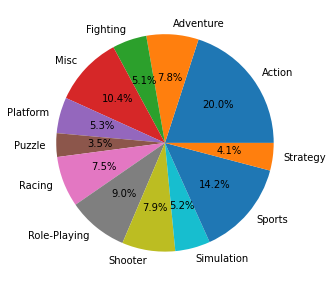

In [ ]:
%matplotlib inline

genre_popularity = df['Genre'].astype(str).value_counts().sort_index()
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(genre_popularity, labels=genre_popularity.index, autopct='%1.1f%%')

Ответ: Action

#### Постройте столбчатую диаграмму количества игр в разрезе игровых платформ. Столбцы должны идти в порядке убывания количества игр. Под какую платформу выпустили больше всего игр?

{'PS2': 2159, 'DS': 2156, 'PS3': 1326, 'Wii': 1324, 'X360': 1261, 'PSP': 1211, 'PS': 1193, 'PC': 954, 'XB': 824, 'GBA': 796, 'GC': 556, '3DS': 507, 'PSV': 411, 'PS4': 336, 'N64': 319, 'SNES': 239, 'XOne': 213, 'SAT': 173, 'WiiU': 143, '2600': 133, 'NES': 98, 'GB': 98, 'DC': 52, 'GEN': 27, 'NG': 12, 'SCD': 6, 'WS': 6, '3DO': 3, 'TG16': 2, 'GG': 1, 'PCFX': 1}


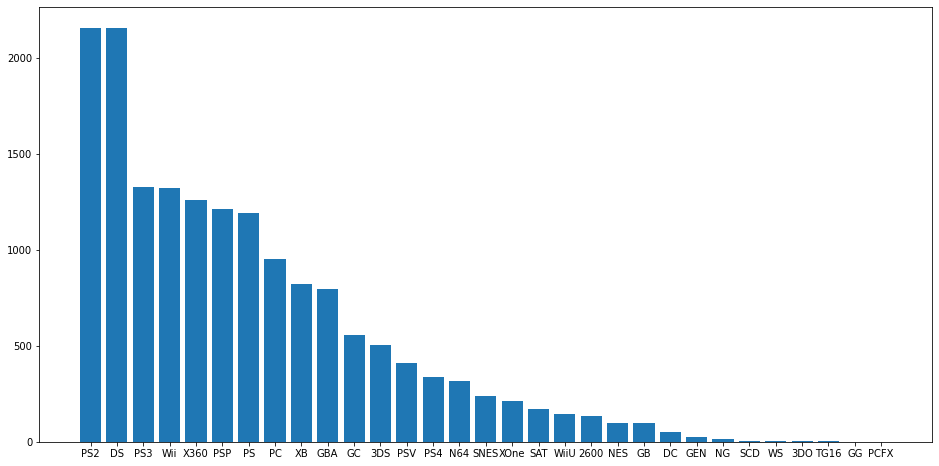

In [ ]:
platform_popularity = {}
for index, row in df.iterrows():
    platform_popularity[row['Platform']] = platform_popularity.get(row['Platform'], 0) + 1

platform_popularity = dict(sorted(platform_popularity.items(), key = lambda x: x[1], reverse = True))
    
fig, ax = plt.subplots(figsize=(16, 8))
ax.bar(platform_popularity.keys(), platform_popularity.values())
print(platform_popularity)

Ответ: PS2 (DS - для исходных значений, без удаленных строк)

#### Постройте столбчатую диаграмму количества игр по годам. Столбцы должны идти в хронологическом порядке. Какая пятилетка была самой удачной для игростроя?

<class 'pandas.core.series.Series'>


<BarContainer object of 40 artists>

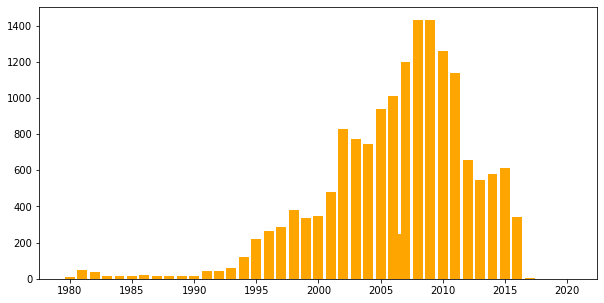

In [ ]:
releases_per_year = df['Year'].astype(float).value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(releases_per_year.index, releases_per_year, color='orange')

Ответ: 2007-2011

#### Постройте столбчатую диаграмму общих доходов игровой индустрии по годам. Столбцы должны идти в хронологическом порядке. Какой год был самым прибыльным?

<BarContainer object of 40 artists>

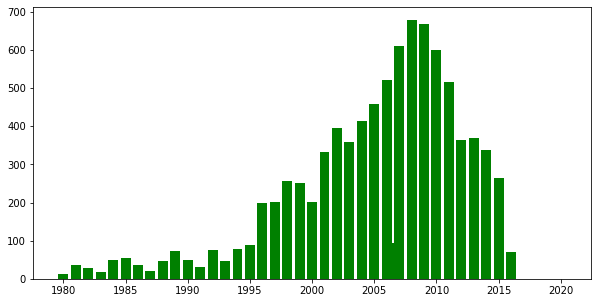

In [ ]:
sales_per_year = df['Year'].astype(float).value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(sales_per_year.index, [df[df['Year'] == i]['Global_Sales'].sum() for i in sales_per_year.index], color='g')

Ответ: 2008

#### Постройте диаграмму рассеивания между платформами и жанрами. Размер точки соответствует объему продаж. 

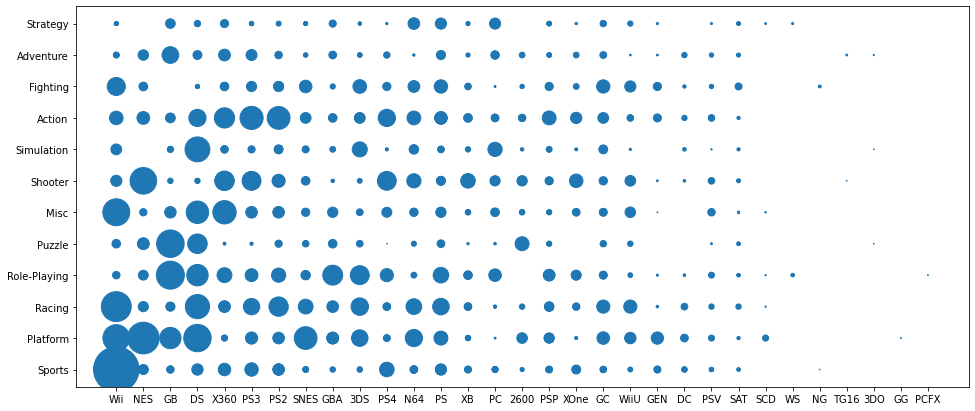

In [ ]:
fig, ax = plt.subplots(figsize=(16, 7))
ax.scatter(df['Platform'], df['Genre'], s=df['Global_Sales'] * 25)

#### Постройте линейный график объемов продаж шутеров в Японии по годам. Какой год был самым прибыльным?

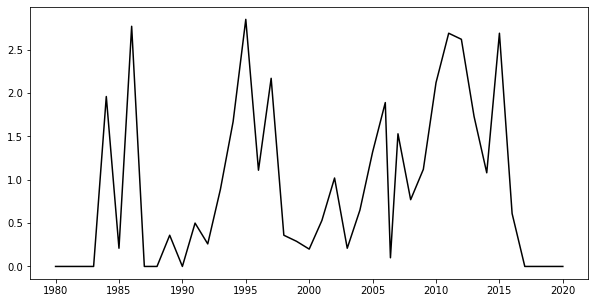

In [ ]:
shooters_sales_Japan = df['Year'].astype(float).value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(shooters_sales_Japan.index, [df[(df['Year'] == i) & (df['Genre'] == 'Shooter')]['JP_Sales'].sum() for i in shooters_sales_Japan.index], color='black')

Ответ: 1995

### Дополнительные вопросы

#### Какие игры являются самыми старыми?

In [ ]:
print(df[df['Year'] == df['Year'].min()].Name.to_string(index=False))

       Asteroids
 Missile Command
         Kaboom!
        Defender
          Boxing
      Ice Hockey
         Freeway
          Bridge
        Checkers


Ответ: 
Asteroids, 
Missile Command, 
Kaboom!, 
Defender, 
Boxing, 
Ice Hockey, 
Freeway, 
Bridge, 
Checkers

#### Сколько шутеров было выпущено в 2003 году?

In [ ]:
print(len(df[(df['Year'] == 2003) & (df['Genre'] == 'Shooter')]))

73


Ответ: 73